# Aufgabe-D-Schilder

## Allgemeines

Eine allgemeine Beschreibung der Laboraufgaben inklusive des Vorgehens, den Bewertungsrichtlinien und der Abgabe finden Sie  <a href="ML-allgemein.ipynb">hier</a>

## Bearbeiter
Patrick Küsters (9815596)<br>
Nick Kramer (3122448)<br>
Sören Holzenkamp (8528927)<br>

## VM

1. Ping external IP (Floating IP)
1.1 Not working? --> New Floating IP
1.2 Working --> ssh ubuntu@141.72.191.72 -i privatekey.txt

## Datenquelle


* Laden Sie ihre Daten von http://141.72.190.207/ml_lab/D_schilder herunter
    * Die Daten sind geschützt. 
    * Sie müssen evtl. in einem Netzwerk der DHBW (z.B. WLAN, VPN, ...) angemeldet sein. 
        * Sie können sich auf der Webseite mit dem Benutzernamen dhbw und dem Zugangsnamen ml_2021 anmelden. 
* Die Daten sind in einem anwendungsspezifischen Format gespeichert.
    * Sie finden evtl. Informationen über die Daten in einer "README" Datei. 
    * Finden Sie keine solche Datei sind die Daten selbst erklärend. 
    
    



## Aufgabe

* die Daten 
    * enthalten mehr als 50000 Bilder von Verkehrsschilder auf deutschen Straßen
    * pro Klasse der Daten gibt es ein Verzeichnis
    * in jeder Klasse gibt eine CSV-Datei mit Annotationen der Bilder
        * Die Namen lauten GT-<ClassID>.csv
* die Bilder 
    * enthalten genau ein Verkehrszeichen, mit ca. 10% Rand um das Verkehrszeichen
    * sind im PPM Format gespeichert
    * die Größen der Bilder variieren von 15x15 Pixel bis zu 250x250 Pixel
        * die Bilder müssen aber nicht quadratisch sein
    * In den Annotationen ist auch die Bounding Box hinterlegt
* die Annotations-Datei hat den folgenden Werte
    * Dateiname, Width, Height, BB.x1, BB.y1, BB.x2, BB.y2, ClassId
        * BB steht für BoundingBox

Erstellen Sie ein tiefes neuronales Netz, dass Schilder in Bildern erkennt und die Position des erkannten Schilds als Bounding Box ausgibt! Die Lösung soll auch mehrere Schilder in einem Bild erkennen können! 


# Lösung

* Beginnen Sie hier mit Ihrer Dokumentation und Implementierung! 

In [1]:
import sys
from pathlib import Path
module_path = str(Path.cwd() / "src")
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import cv2
import pandas as pd

In [3]:
from reader import Reader
from display_data import ImageDisplayer

Funktion "drawImage" --> BB und Image wird dargestellt, mapping über Namen<br>
Einlesen von Bildern mit zugehörigen Namen

In [4]:
reader = Reader()
df = reader.read_data(folders=43, pre_path="../ML-Lab_data/data/")
df

,Filename,Folder,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000_00000.ppm,../ML-Lab_data/data/0\,29,30,5,6,24,25,0
1,00000_00001.ppm,../ML-Lab_data/data/0\,30,30,5,5,25,25,0
2,00000_00002.ppm,../ML-Lab_data/data/0\,30,30,5,5,25,25,0
3,00000_00003.ppm,../ML-Lab_data/data/0\,31,31,5,5,26,26,0
4,00000_00004.ppm,../ML-Lab_data/data/0\,30,32,5,6,25,26,0
...,...,...,...,...,...,...,...,...,...
39204,00007_00025.ppm,../ML-Lab_data/data/42\,52,56,5,6,47,51,42
39205,00007_00026.ppm,../ML-Lab_data/data/42\,56,58,5,5,51,53,42
39206,00007_00027.ppm,../ML-Lab_data/data/42\,58,62,5,6,53,57,42
39207,00007_00028.ppm,../ML-Lab_data/data/42\,63,69,5,7,58,63,42


<AxesSubplot:ylabel='Frequency'>

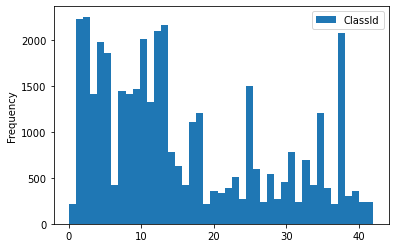

In [5]:
df.plot(y="ClassId", kind="hist", bins=len(set(df["ClassId"])))

<AxesSubplot:ylabel='Frequency'>

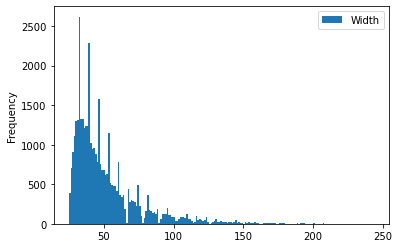

In [6]:
df.plot(y="Width", kind="hist", bins=len(set(df["Width"])))

<AxesSubplot:ylabel='Frequency'>

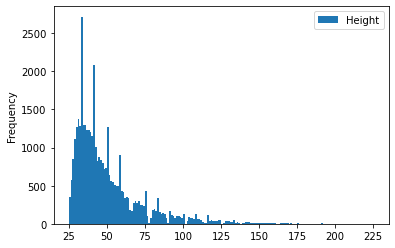

In [7]:
df.plot(y="Height", kind="hist", bins=len(set(df["Height"])))

<AxesSubplot:ylabel='Frequency'>

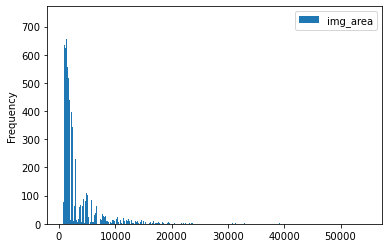

In [8]:
df["img_area"] = df["Width"]*df["Height"]
df.plot(y="img_area", kind="hist", bins=len(set(df["img_area"])))

In [9]:
df["x_box_len"] = df["Roi.X2"] - df["Roi.X1"]
df["y_box_len"] = df["Roi.Y2"] - df["Roi.Y1"]
df["box_area"] = df["x_box_len"]*df["y_box_len"]

<AxesSubplot:ylabel='Frequency'>

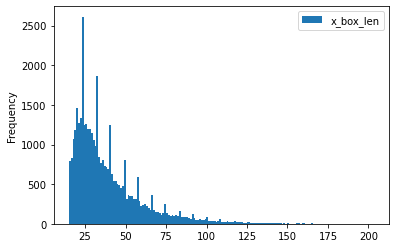

In [11]:
df.plot(y="x_box_len", kind="hist", bins=len(set(df["x_box_len"])))

<AxesSubplot:ylabel='Frequency'>

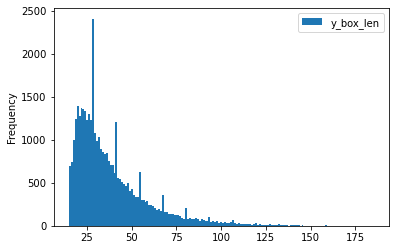

In [12]:
df.plot(y="y_box_len", kind="hist", bins=len(set(df["y_box_len"])))

<AxesSubplot:ylabel='Frequency'>

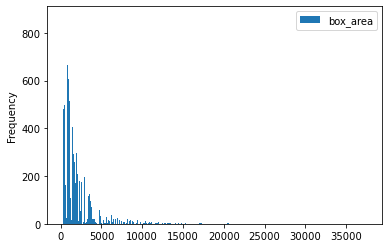

In [13]:
df.plot(y="box_area", kind="hist", bins=len(set(df["box_area"])))

In [14]:
ImageDisplayer(df, 100, 105)